In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

From equation 3.2 of *Monteo Carlo Methods in Financial Engineering* if $\{ W(t), 0 \leq t \leq T\}$ is a Brownian motion process then if $t_0 = 0$ and $W(0) = 0$ then we have
$$
W(t_{i+1}) = W(t_i) + \sqrt{t_{i+1} - t_i} Z_{i+1}
$$
where the $Z_i$ are independent standard normal random variables.

In [11]:
mu, sigma = 0.0, 1.0

In [12]:
paths = 10

steps = 1000

In [21]:
W = np.zeros((paths, steps))

In [14]:
Z = np.random.normal(mu, sigma, (paths, steps))

In [15]:
interval = [0.0, 1.0]

dt = (interval[1] - interval[0]) / (steps - 1)

In [16]:
t_axis = np.linspace(interval[0], interval[1], steps)

In [ ]:
for i in range(1, steps):
    W[:, i] = W[:,i-1] + np.sqrt(dt) * Z[:, i]

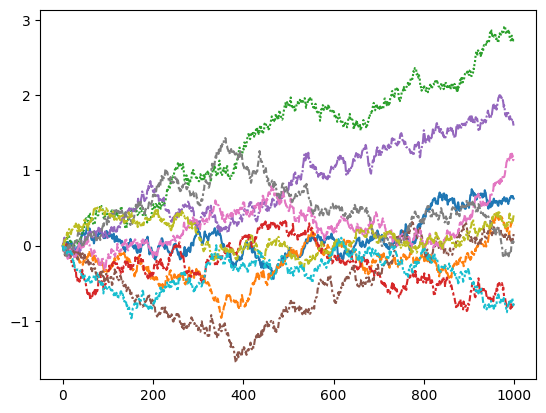

In [18]:
df = pd.DataFrame(W).T

df.set_index(t_axis)

sns.lineplot(data=df)
plt.legend([],[], frameon=False)



<Axes: ylabel='Density'>

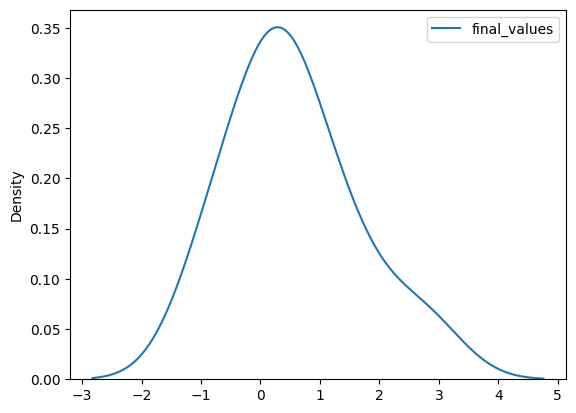

In [20]:
final_values = pd.DataFrame({'final_values': W[:, -1]})
sns.kdeplot(final_values)

# Nonstandard brownian motion

Equation 3.3 is a generalized version of equation 3.2, allowing for a different drift and diffusion constant. In particular,
$$
X(t_{i+1}) = X_(t_i) + \mu(t_{i+1} - t_i) + \sigma \sqrt{t_{i+1} - t_i} Z_{i+1}
$$

In [31]:
mu, sigma = 5.0, 1.5

In [32]:
X = np.zeros((paths, steps))

for i in range(1, steps):
    X[:, i] = X[:,i-1] + mu * dt + sigma * np.sqrt(dt) * Z[:, i]

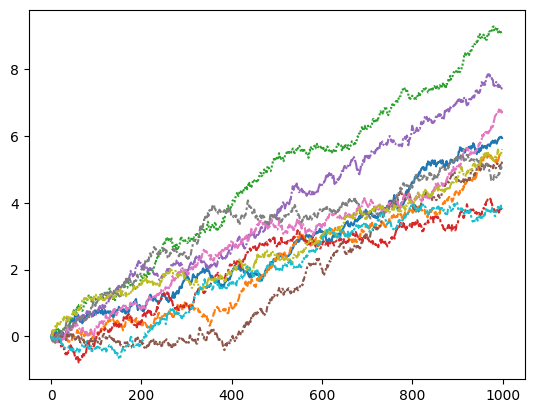

In [33]:
df = pd.DataFrame(X).T

df.set_index(t_axis)

sns.lineplot(data=df)
plt.legend([],[], frameon=False)



<Axes: ylabel='Density'>

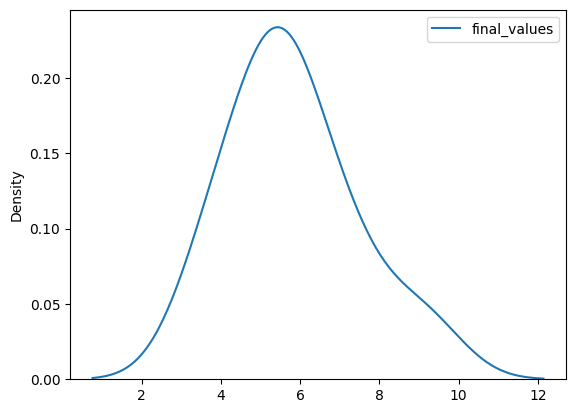

In [34]:
final_values = pd.DataFrame({'final_values': X[:, -1]})
sns.kdeplot(final_values)

In [35]:
final_values.describe()

,final_values
count,10.000000
mean,5.812184
std,1.605975
min,3.805848
25%,5.096688
50%,5.505730
75%,6.543749
max,9.098838
